In [56]:
import pandas as pd

data=pd.read_csv("WineQT.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [57]:
values=[[] for i in data]
# values
keys=[key for key in data]
# keys
for i in range(len(data)):
    # print(data[i])
    # break
    for key in range(len(keys)):
        # print(data[key][i])
        values[key].append(data[keys[key]][i])
    # break
# print(values)

In [58]:
import numpy as np
for x in range(len(keys)):
    print("column:",keys[x])
    arr=np.array(values[x])
    print("mean:",np.mean(arr),"\tstd dev:",np.std(arr),"\tmin:",np.min(arr),"\tmax:",np.max(arr))
    # print()

column: fixed acidity
mean: 8.311111111111112 	std dev: 1.7468303726275016 	min: 4.6 	max: 15.9
column: volatile acidity
mean: 0.5313385826771653 	std dev: 0.17955459612835617 	min: 0.12 	max: 1.58
column: citric acid
mean: 0.2683639545056868 	std dev: 0.19659979421574741 	min: 0.0 	max: 1.0
column: residual sugar
mean: 2.5321522309711284 	std dev: 1.355324197143589 	min: 0.9 	max: 15.5
column: chlorides
mean: 0.08693263342082239 	std dev: 0.04724665655215518 	min: 0.012 	max: 0.611
column: free sulfur dioxide
mean: 15.615485564304462 	std dev: 10.246001115067605 	min: 1.0 	max: 68.0
column: total sulfur dioxide
mean: 45.91469816272966 	std dev: 32.76778677994138 	min: 6.0 	max: 289.0
column: density
mean: 0.9967304111986001 	std dev: 0.001924224834379527 	min: 0.99007 	max: 1.00369
column: pH
mean: 3.3110148731408575 	std dev: 0.15659551281704315 	min: 2.74 	max: 4.01
column: sulphates
mean: 0.6577077865266842 	std dev: 0.1703241580362606 	min: 0.33 	max: 2.0
column: alcohol
mean: 10.

<BarContainer object of 6 artists>

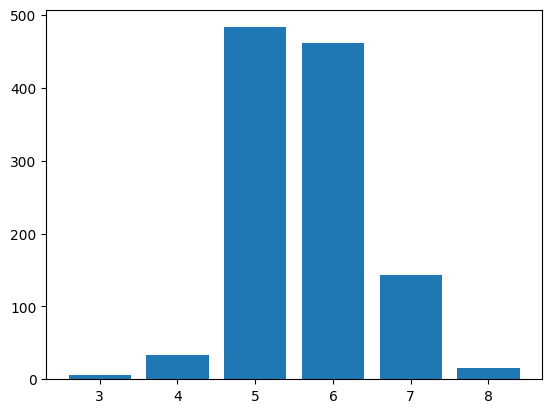

In [59]:
import matplotlib.pyplot as plt

d={}
for i in data["quality"]:
    if i not in d.keys(): d[i]=1
    else: d[i]+=1

x=d.keys()
y=d.values()

plt.bar(x,y)

In [60]:
X,Y=[],[]

for i in range(len(data)):
    xvals=[]
    yvals=[ 0 for i in range(6)]
    for key in keys:
        if key == "quality":
            # Y.append(data[key][i])
            yvals[data[key][i]-3]=1
        else:
            xvals.append(data[key][i])
    X.append(xvals)
    Y.append(yvals)

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
# Y = imputer.fit_transform(Y)

scaler = MinMaxScaler()
X= scaler.fit_transform(X)
# Y = scaler.fit_transform(Y)

scaler = StandardScaler()
X = scaler.fit_transform(X)
# Y = scaler.fit_transform(Y)


In [62]:
from sklearn.model_selection import train_test_split

x_train,x_oth,y_train,y_oth=train_test_split(X,Y,test_size=0.3,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_oth,y_oth,test_size=0.1,random_state=42)

In [63]:
len(y_train),len(y_test),len(y_val)

(800, 35, 308)

In [64]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score


class MLPClassifier:
    def __init__(self, input_size, hidden_layers, num_neurons, output_size, learning_rate=0.01, activation='sigmoid', optimizer='sgd'):
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.num_neurons = num_neurons
        self.output_size = output_size
        self.learning_rate = learning_rate

        self.weights, self.biases = self.initialize_weights()

        self.activation = self.get_activation_function(activation)

        self.optimizer_choice = optimizer 

    def initialize_weights(self):
        weights = [np.random.randn(self.input_size, self.num_neurons) * np.sqrt(1.0 / self.input_size)]
        biases = [np.zeros((1, self.num_neurons))]

        for _ in range(self.hidden_layers - 1):
            weights.append(np.random.randn(self.num_neurons, self.num_neurons) * np.sqrt(1.0 / self.num_neurons))
            biases.append(np.zeros((1, self.num_neurons)))

        weights.append(np.random.randn(self.num_neurons, self.output_size) * np.sqrt(1.0 / self.num_neurons))
        biases.append(np.zeros((1, self.output_size)))

        return weights, biases
    
    def forward(self, x):
        activations = []
        layer_input = x

        for i in range(self.hidden_layers):
            layer_output = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_output = self.activation(layer_output)
            activations.append(layer_output)
            layer_input = layer_output

        output = np.dot(layer_input, self.weights[-1]) + self.biases[-1]
        return output, activations

    def backward(self, x, y, output, activations):
        gradients = []
        num_samples = x.shape[0]

        delta = output - y

        for i in range(self.hidden_layers - 1, -1, -1):
            dw = np.dot(activations[i].T, delta) / num_samples
            db = np.sum(delta, axis=0) / num_samples
            gradients.append({'dw': dw, 'db': db})

            if i > 0:
                delta = np.dot(delta, self.weights[i].T) * (activations[i] * (1 - activations[i]))

        return gradients

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.sum(y_true * np.log(y_pred)) / len(y_true)

    def get_activation_function(self, activation):
        if activation == 'sigmoid':
            return self.sigmoid
        elif activation == 'relu':
            return self.relu
        elif activation == 'tanh':
            return self.tanh
        else:
            return

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def tanh(self, x):
        return np.tanh(x)

    def getoptimizer(self, gradients):
        for i in range(len(self.weights)):
            self.weights[0][i][0] -= self.learning_rate * gradients[0]['dw'][0][0]
            self.biases[i] -= self.learning_rate * gradients[0]['db'][0]
    
    def train(self, x_train, y_train, x_val, y_val, batch_size=32, num_epochs=100):
        if self.optimizer_choice == 'sgd':
            for epoch in range(num_epochs):
                for i in range(len(x_train)):
                    x_batch = x_train[i]
                    y_batch = y_train[i]

                    output, activations = self.forward(x_batch)
                    loss = self.cross_entropy_loss(y_batch, self.softmax(output))
                    gradients = self.backward(x_batch, y_batch, self.softmax(output), activations)
                    self.getoptimizer(gradients)
                valid_output, _ = self.forward(x_val)
                valid_pred = self.softmax(valid_output)
                accuracy = np.mean(np.argmax(valid_pred, axis=1) == np.argmax(y_val, axis=1))
                loss = self.cross_entropy_loss(y_val, valid_pred)

                # print(f"Epoch {epoch + 1}/{num_epochs}: Loss={loss:.4f}, Accuracy={accuracy:.4f}")
        elif self.optimizer_choice == 'bgd':
            for epoch in range(num_epochs):
                output, activations = self.forward(x_train)
                loss = self.cross_entropy_loss(y_train, self.softmax(output))
                gradients = self.backward(x_train, y_train, self.softmax(output), activations)
                self.getoptimizer(gradients)
                valid_output, _ = self.forward(x_val)
                valid_pred = self.softmax(valid_output)
                accuracy = np.mean(np.argmax(valid_pred, axis=1) == np.argmax(y_val, axis=1))
                loss = self.cross_entropy_loss(y_val, valid_pred)

                # print(f"Epoch {epoch + 1}/{num_epochs}: Loss={loss:.4f}, Accuracy={accuracy:.4f}")
        elif self.optimizer_choice == 'mbgd':
            for epoch in range(num_epochs):
                for i in range(0, len(x_train), batch_size):
                    x_batch = x_train[i:i+batch_size]
                    y_batch = y_train[i:i+batch_size]

                    output, activations = self.forward(x_batch)
                    loss = self.cross_entropy_loss(y_batch, self.softmax(output))
                    gradients = self.backward(x_batch, y_batch, self.softmax(output), activations)
                    self.getoptimizer(gradients)
                valid_output, _ = self.forward(x_val)
                valid_pred = self.softmax(valid_output)
                accuracy = np.mean(np.argmax(valid_pred, axis=1) == np.argmax(y_val, axis=1))
                loss = self.cross_entropy_loss(y_val, valid_pred)

                # print(f"Epoch {epoch + 1}/{num_epochs}: Loss={loss:.4f}, Accuracy={accuracy:.4f}")
        else:
            return

    def predict(self, x):
        output, _ = self.forward(x)
        return np.argmax(self.softmax(output), axis=1)

input_size = x_train.shape[1]
hidden_layers = 1
num_neurons = 64
output_size = len(y_train[0])

for act in ["sigmoid", "tanh", "relu"]:
    for opt in ["sgd", "bgd", "mbgd"]:
        mlp_model = MLPClassifier(input_size=input_size,hidden_layers=hidden_layers,num_neurons=num_neurons,output_size=output_size,learning_rate=0.01,activation=act,optimizer=opt)
        mlp_model.train(x_train, y_train, x_val, y_val, batch_size=32, num_epochs=100)
        pred=mlp_model.predict(x_test)
        print(act, opt)
        print(accuracy_score(np.argmax(y_test, axis=1),pred))


sigmoid sgd
0.4
sigmoid bgd
0.08571428571428572
sigmoid mbgd
0.2571428571428571
tanh sgd
0.0
tanh bgd
0.02857142857142857
tanh mbgd
0.2571428571428571
relu sgd
0.0
relu bgd
0.14285714285714285
relu mbgd
0.02857142857142857


In [65]:
import wandb
wandb.init(project="Multilayer Perceptron Classifier Single Label")

learning_rates = [0.001, 0.01]
num_epochs_list = [200, 500, 1000]
num_neurons = [64, 128]
for act in ["sigmoid", "tanh", "relu"]:
    for opt in ["sgd", "bgd", "mbgd"]:
        for learning_rate in learning_rates:
            for num_epochs in num_epochs_list:
                for neurons in num_neurons:
                    wandb.config.learning_rate = learning_rate
                    wandb.config.num_epochs = num_epochs
                    
                    model = MLPClassifier(input_size=input_size,hidden_layers=hidden_layers,num_neurons=neurons,output_size=output_size,learning_rate=0.01,activation=act,optimizer=opt)
                    model.train(x_train, y_train, x_val, y_val)
                    pred=model.predict(x_test)
                    accuracy = accuracy_score(np.argmax(y_test, axis=1),pred)
                    wandb.log({"activation": act, "optimizer": opt, "number of neurons": neurons, "learning_rate": learning_rate, "num_epochs": num_epochs, "accuracy": accuracy})

accuracy,▁
hidden layers,▁
learning_rate,▁
num_epochs,▁
accuracy,0.08571
activation,sigmoid
hidden layers,1
learning_rate,0.001
num_epochs,200
optimizer,sgd
